In [1]:
from PIL import Image, ImageDraw, ImageFont
import argparse
import numpy as np

sample_rate = 0.4

In [3]:
file = './images/dyngq_2019-12-27-21-35-01.png'

im = Image.open(file)

# Compute letter aspect ratio
font = ImageFont.load_default()
# font = ImageFont.truetype("SourceCodePro-Bold.ttf", size=12)
aspect_ratio = font.getsize("x")[0] / font.getsize("x")[1]
new_im_size = np.array(
    [im.size[0] * sample_rate, im.size[1] * sample_rate * aspect_ratio]
).astype(int)

# Downsample the image
im = im.resize(new_im_size)

# Keep a copy of image for color sampling
im_color = np.array(im)

# Convert to gray scale image
im = im.convert("L")

# Convert to numpy array for image manipulation
im = np.array(im)

# Defines all the symbols in ascending order that will form the final ascii
symbols = np.array(list(" .-vM"))

# Normalize minimum and maximum to [0, max_symbol_index)
im = (im - im.min()) / (im.max() - im.min()) * (symbols.size - 1)

# Generate the ascii art
ascii = symbols[im.astype(int)]

# Create an output image for drawing ascii text
letter_size = font.getsize("x")
im_out_size = new_im_size * letter_size
bg_color = "black"
im_out = Image.new("RGB", tuple(im_out_size), bg_color)
draw = ImageDraw.Draw(im_out)

In [13]:
# Draw text
y = 0
for i, line in enumerate(ascii):
    for j, ch in enumerate(line):
        color = tuple(im_color[i, j])  # sample color from original image
        draw.text((letter_size[0] * j, y), ch[0], fill=color, font=font)
    y += letter_size[1]  # increase y by letter height

# Save image file
# im_out.save(file + ".ascii.png")

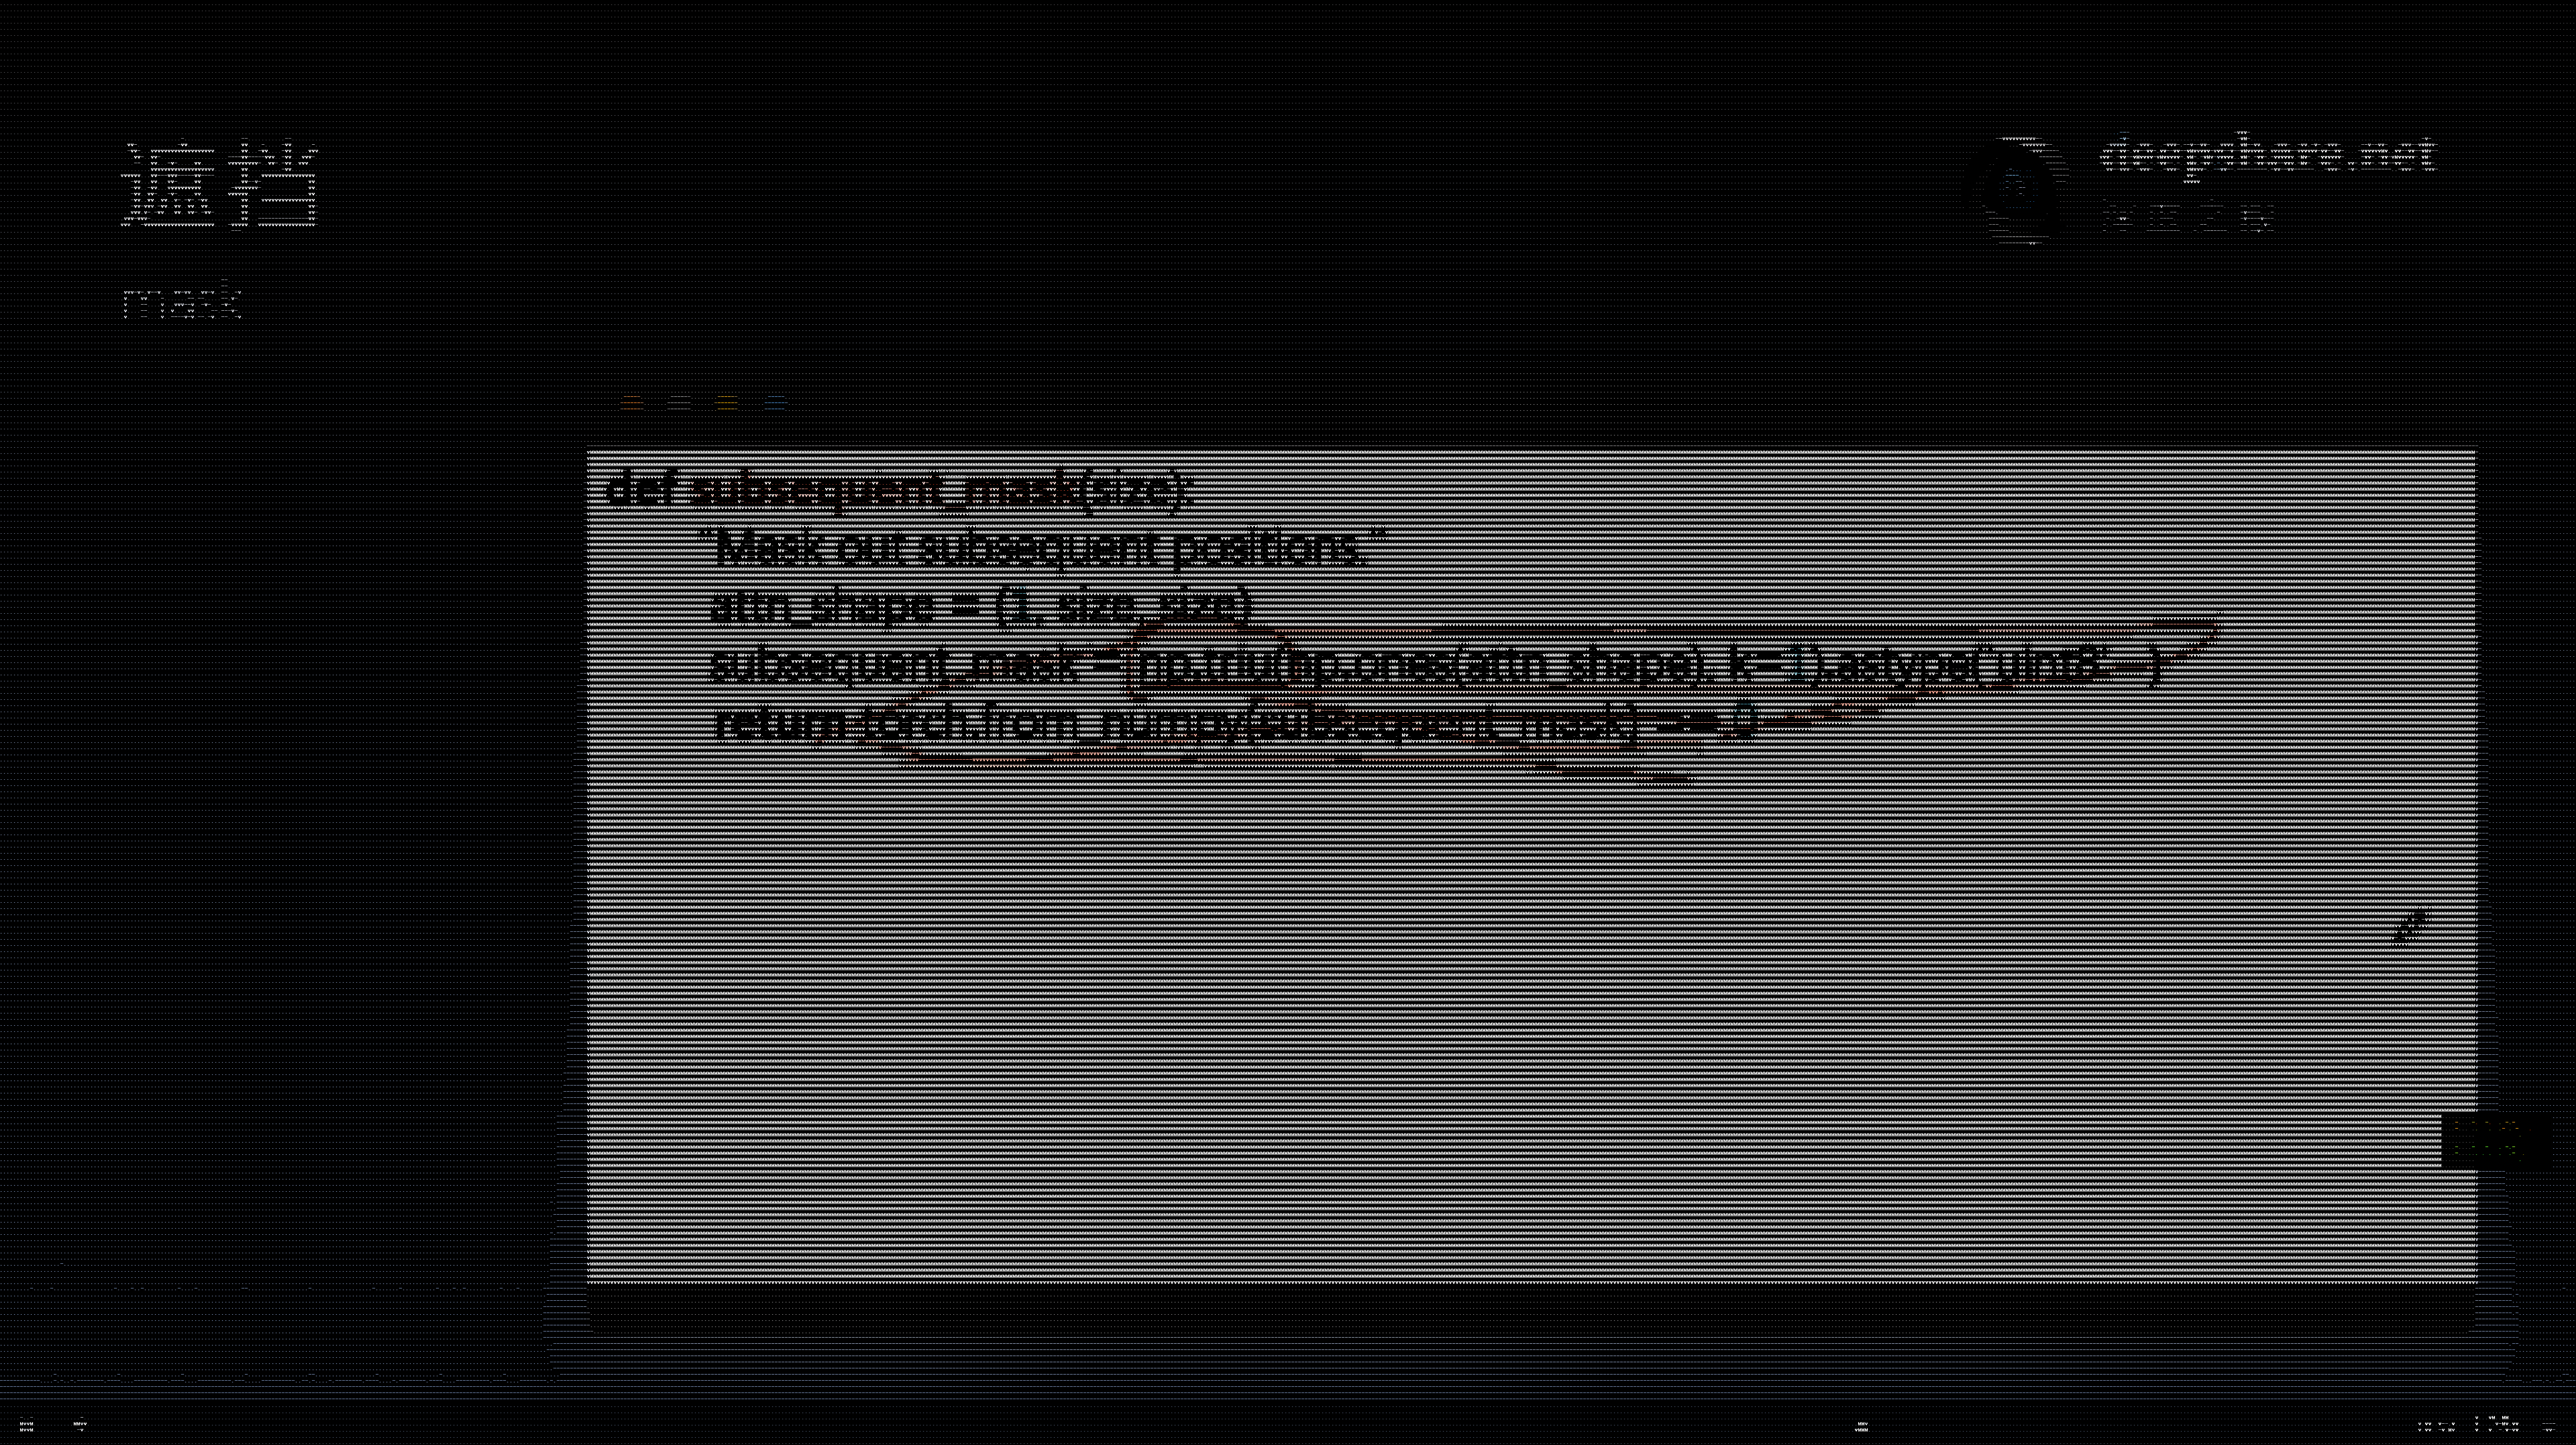

In [18]:
im_out

In [ ]:
def ascii_art(file):
    im = Image.open(file)

    # Compute letter aspect ratio
    font = ImageFont.load_default()
    # font = ImageFont.truetype("SourceCodePro-Bold.ttf", size=12)
    aspect_ratio = font.getsize("x")[0] / font.getsize("x")[1]
    new_im_size = np.array(
        [im.size[0] * sample_rate, im.size[1] * sample_rate * aspect_ratio]
    ).astype(int)

    # Downsample the image
    im = im.resize(new_im_size)

    # Keep a copy of image for color sampling
    im_color = np.array(im)

    # Convert to gray scale image
    im = im.convert("L")

    # Convert to numpy array for image manipulation
    im = np.array(im)

    # Defines all the symbols in ascending order that will form the final ascii
    symbols = np.array(list(" .-vM"))

    # Normalize minimum and maximum to [0, max_symbol_index)
    im = (im - im.min()) / (im.max() - im.min()) * (symbols.size - 1)

    # Generate the ascii art
    ascii = symbols[im.astype(int)]

    # Create an output image for drawing ascii text
    letter_size = font.getsize("x")
    im_out_size = new_im_size * letter_size
    bg_color = "black"
    im_out = Image.new("RGB", tuple(im_out_size), bg_color)
    draw = ImageDraw.Draw(im_out)

    # Draw text
    y = 0
    for i, line in enumerate(ascii):
        for j, ch in enumerate(line):
            color = tuple(im_color[i, j])  # sample color from original image
            draw.text((letter_size[0] * j, y), ch[0], fill=color, font=font)
        y += letter_size[1]  # increase y by letter height

    # Save image file
    im_out.save(file + ".ascii.png")


if __name__ == "__main__":
    parser = argparse.ArgumentParser(description="Convert any image to ascii art.")
    parser.add_argument(
        "file", type=str, help="input image file",
    )
    args = parser.parse_args()

    ascii_art(args.file)